In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import random

# Validación cruzada

Para verlo mejor, vamos a descargarlo como un dataframe y luego mostraremos un gráfico de los tipos que existen.

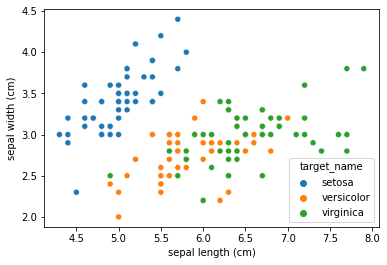

In [ ]:
# Loading Iris as pandas DataFrame
iris = datasets.load_iris(as_frame=True)

# Creating DataFrame to match up target label with target_name
iris_target_names = pd.DataFrame(data=dict(target=[0, 1, 2],
                                           target_name=iris.target_names))

data = (iris["frame"]
        .merge(right=iris_target_names,
               on="target",
               how="left"))

sns.scatterplot(x="sepal length (cm)",
                y="sepal width (cm)",
                hue="target_name",
                data=data)

In [ ]:
#descargo el dataset dividido en
#(1) X dataset sin valores de clasificación
#(2) y valores de clasificación
X, y = datasets.load_iris(return_X_y=True)



Para realizar una separación puntual del conjunto de datos en los conjuntos de entrenamiento (70 %) y pruebas (30 %), es tan sencillo como emplear la función train_test_split:



```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
```




Para realizar una validación cruzada sin repetición, podemos elegir un método de aprendizaje (por ejemplo, SVC) y la función cross_val_score en la que podremos indicar como argumento la estrategia para obtener los conjuntos de entrenaminto y test (en este caso KFold, que explicaremos posteriormente):

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1, random_state=42)

k_fold = KFold(n_splits=5) #defino un KFold con 5 iteraciones
scores = cross_val_score(clf, X, y, cv=k_fold) #por defecto scoring='accuracy'
print(scores)

[1.         1.         0.86666667 1.         0.86666667]


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.07


Tal como puede observarse, se obtiene como salida un array con el grado de exactitud del modelo en cada iteración. En particular, la validación anterior se ejecutó con cinco iteraciones obteniendo un 100 % en la primera, 100% en la segunda, 0.8667% en la tercera, 100% en la cuarta y, finalmente, un 0.8667% en la última, lo cual es un indicador de la buena calidad del modelo para ese conjunto de datos en concreto.

Por defecto, el resultado obtenido de cada iteración de CV (Cross-Validation) es el resultado del metodo de estimación. Es posible cambiarlo utilizando el parámetro *scoring*.

In [ ]:
from sklearn import metrics

clf = SVC(kernel='linear', C=1, random_state=42, probability=True)
k_fold = KFold(n_splits=5) #defino un KFold con 5 iteraciones
scores = cross_val_score(clf, X, y, cv=k_fold, scoring='f1_weighted')
scores

array([1.        , 1.        , 0.92857143, 1.        , 0.92857143])

In [ ]:
print("%0.2f f1_weighted with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 f1_weighted with a standard deviation of 0.03


## Definición de múltiples métricas para en la validación cruzada

Para poder definir varias métricas utilizaremos la función *cross_validate* (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate).

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
clf = SVC(kernel='linear', C=1, random_state=42)
k_fold = KFold(n_splits=5) #defino un KFold con 5 iteraciones
scores = cross_validate(clf, X, y, cv=k_fold, scoring=['accuracy','f1_weighted'])
scores

{'fit_time': array([0.00922322, 0.00156641, 0.00140333, 0.00146532, 0.00163317]),
 'score_time': array([0.00243711, 0.00159883, 0.00198317, 0.00452781, 0.00194454]),
 'test_accuracy': array([1.        , 1.        , 0.86666667, 1.        , 0.86666667]),
 'test_f1_weighted': array([1.        , 1.        , 0.92857143, 1.        , 0.92857143])}

## Estrategias

Podemos definir la estrategia para definir los conjuntos de entrenaminto y test a través del parámetro *cv*.

*   **StratifiedKFold** para preservar el porcentaje de muestras para cada clase.
*   **GroupKFold** para asegurarse de que el mismo grupo no aparecerá en dos subconjuntos de test diferentes.
*   **StratifiedGroupKFold** para mantener la restricción de GroupKFold al intentar devolver subconjuntos de test estratificados.







In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold


#KFold
print("KFold")
clf = SVC(kernel='linear', C=1, random_state=42)
k_fold = KFold(n_splits=5) #defino un KFold con 5 iteraciones
scores = cross_val_score(clf, X, y, cv=k_fold)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))

#StratifiedKFold
print("StratifiedKFold")
stratified_k_fold = StratifiedKFold(n_splits=5) #defino un StratifiedKFold con 5 iteraciones
scores = cross_val_score(clf, X, y, cv=stratified_k_fold, scoring='accuracy')
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))


print("GroupKFold")
#En este caso no tenemos un dataframe con grupos, por lo que no tiene sentido su utilización
#No obstante, dejo el código de ejemplo para futuros casos donde sí tenga sentido.

#groups = X['your_group_name'] # or pass your group another way
groups =  y # para que se pueda ejecutar
group_k_fold = GroupKFold(n_splits=3) #defino un StratifiedKFold con 5 iteraciones
scores = cross_val_score(clf, X, y, cv=group_k_fold, groups= groups)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f\n" % (scores.mean(), scores.std()))


KFold
[1.         1.         0.86666667 1.         0.86666667]
0.95 accuracy with a standard deviation of 0.07

StratifiedKFold
[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.98 accuracy with a standard deviation of 0.02

GroupKFold
[0. 0. 0.]
0.00 accuracy with a standard deviation of 0.00



# Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

y_real = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]

cm = confusion_matrix(y_real, y_pred)
print (cm)

[[3 2]
 [1 4]]


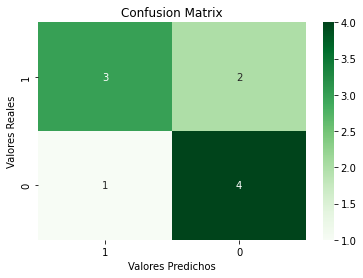

In [ ]:
#Creación de Figura
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Greens');
#annot=True to annotate cells, ftm=g to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Valores Predichos');
ax.set_ylabel('Valores Reales');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels([1, 0]);
ax.yaxis.set_ticklabels([1, 0]);
plt.show()

## Ejemplo de uso de matriz de confusión multiclase


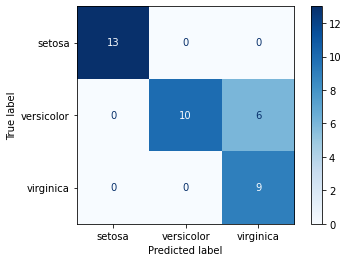

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

#Importación de Iris Dataset
iris = datasets.load_iris()
#Conjunto de ejemplos
X = iris.data
#Clases
y = iris.target
#nombre de las clases
class_names = iris.target_names

# División del DataSet en dos cojuntos: entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Usamos como clasificador Support Vector Classification
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(
      classifier,
      X_test,
      y_test,
      display_labels=class_names,
      cmap=plt.cm.Blues
)


plt.show()


# Métricas de evaluación

## Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']
print(accuracy_score(y_true, y_pred))


0.85


## Precission

In [ ]:
from sklearn.metrics import precision_score
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(precision_score(y_true, y_pred, labels=['A', 'B'], pos_label='A', average="binary"))

0.8


## Recall

In [ ]:
from sklearn.metrics import recall_score
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(recall_score(y_true, y_pred, labels=['A', 'B'], pos_label='A', average="binary"))

0.8888888888888888


## Log Loss

In [ ]:
from sklearn.metrics import log_loss
y_pred =[0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1]
y_true =[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]
print(log_loss(y_true, y_pred))

5.180856439108113


## F1-Score

In [ ]:
from sklearn.metrics import f1_score
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(f1_score(y_true, y_pred, average="weighted"))

0.8503759398496241


## Curvas ROC y AUC


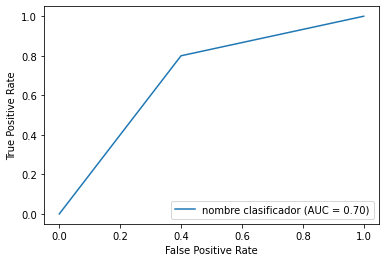

In [ ]:
#Curva ROC y área AUC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

y_true = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]

#calculo el ratio de verdaderos positivos y falsos positivos.
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)

#con estos valores obtengo el valor para la AUC
roc_auc = metrics.auc(fpr, tpr)

#genero el gráfico
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='nombre clasificador')
display.plot()

plt.show()


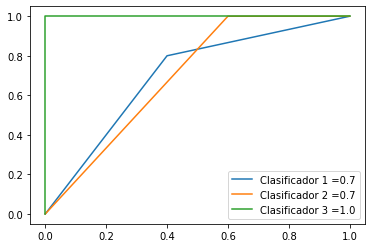

In [ ]:
#Curva ROC y área AUC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

#primer clasificador
y_true =  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred1 = [1, 1, 1, 1, 0, 1, 0, 0, 0, 1]
y_pred2 = [1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
y_pred3 = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

fpr, tpr, _ = metrics.roc_curve(y_true, y_pred1)
roc_auc = round(metrics.auc(fpr, tpr),2)
plt.plot(fpr,tpr,label="Clasificador 1 ="+str(roc_auc))

#segundo clasificador
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred2)
roc_auc = round(metrics.auc(fpr, tpr),2)
plt.plot(fpr,tpr,label="Clasificador 2 ="+str(roc_auc))

#tercer clasificador
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred3)
roc_auc = round(metrics.auc(fpr, tpr),2)
plt.plot(fpr,tpr,label="Clasificador 3 ="+str(roc_auc))

plt.legend()


## Informe global

In [ ]:
from sklearn.metrics import classification_report
y_pred =['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true =['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(classification_report(y_true, y_pred, labels=['A', 'B']))

              precision    recall  f1-score   support

           A       0.80      0.89      0.84         9
           B       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



### En un ejemplo

In [ ]:
from sklearn.metrics import classification_report

#podemos definir la siguiente función para mostrar accuracy, el report y la matriz de confusion
def print_score(clf, X_train, y_train, X_test, y_test):
  pred = clf.predict(X_test)
  clf_report = pd.DataFrame(classification_report(y_test,
                                                    pred,
                                                    output_dict=True))
  print("Test Result:\n================================================")
  print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
  print("_______________________________________________")
  print(f"CLASSIFICATION REPORT:\n{clf_report}")
  print("_______________________________________________")
  print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
  print('\n')






In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


#cargo dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

#creo conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

#normalizo
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Training a SVM classifier using SVC class
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train, y_train)

print_score(svm, X_train, y_train, X_test, y_test)


Test Result:
Accuracy Score: 97.78%
_______________________________________________
CLASSIFICATION REPORT:
              0          1          2  accuracy  macro avg  weighted avg
precision   1.0   0.937500   1.000000  0.977778   0.979167      0.979167
recall      1.0   1.000000   0.933333  0.977778   0.977778      0.977778
f1-score    1.0   0.967742   0.965517  0.977778   0.977753      0.977753
support    15.0  15.000000  15.000000  0.977778  45.000000     45.000000
_______________________________________________
Confusion Matrix: 
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]



